<a href="https://colab.research.google.com/github/DWIKEIKROMI/PCVK_dwike_genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan : 80


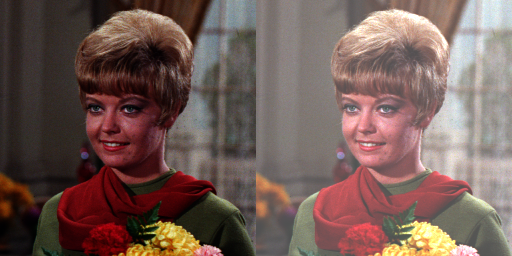

In [56]:
#Praktikum 

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#askes per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range (original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255] : 80
Masukkan nilai konstras [1.0 - 3.0] :2.5


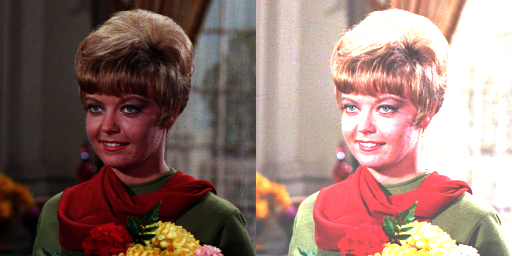

In [57]:
#Tugas 1 - Transformasi constrast

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255] : '))
  contrast = float(input('Masukkan nilai konstras [1.0 - 3.0] :'))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#askes per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range (original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan : 50


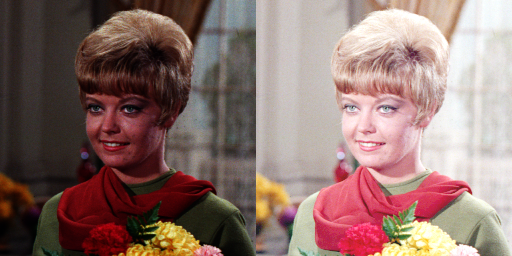

In [58]:
#Tugas 2 - transformasi log brightness

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#askes per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), -255, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

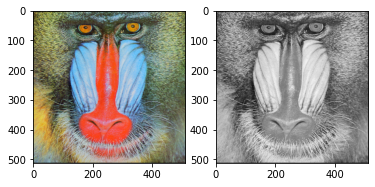

In [64]:
#Tugas 3a Averanging 

original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff'),cv.COLOR_BGR2RGB)
gray_img = np.mean(original, axis=2)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(original)
axarr[1].imshow(gray_img, cmap='gray')

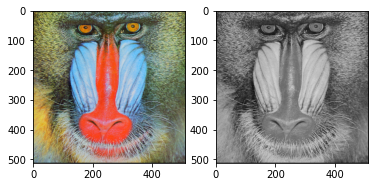

In [60]:
#Tugas 3b lightness

original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff'), cv.COLOR_BGR2RGB)

gray_img = np.zeros(original.shape, original.dtype)
gray_img[:] = original.mean(axis=-1,keepdims=1)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(original)
axarr[1].imshow(gray_img, cmap='gray')

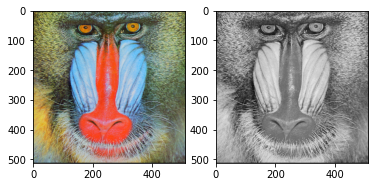

In [61]:
# Tugas 3c Luminance

original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff'), cv.COLOR_BGR2RGB)

R, G, B = original[:,:,0], original[:,:,1],original[:,:,2]
gray_img = (0.21 * R) + (0.72 * G) + (0.07 * B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(original)
axarr[1].imshow(gray_img, cmap='gray')

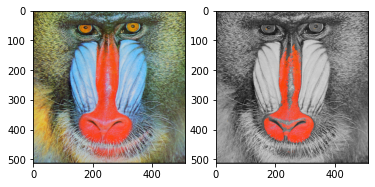

In [63]:
#Tugas 4

original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff'), cv.COLOR_BGR2RGB)
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
finimg = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# creating mask using thresholding over `red` channel (use better use histogram to get threshoding value)
# I have used 200 as thershoding value it can be different for different images
ret, mask = cv.threshold(img[:, :,2], 230, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

# extracting `red` region using `bitwise_and`
red = cv.bitwise_and(finimg, mask3)
gray = cv.cvtColor(finimg, cv.COLOR_BGR2GRAY)
finimg  = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# extracting non-red region
gray = cv.bitwise_and(finimg, 255 - mask3)

out = gray + red
f, axarr = plt.subplots(1,2)
axarr[0].imshow(original)
axarr[1].imshow(out)